In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary/Salary.csv


In [3]:
# Importing important libraries

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [4]:
# Reading and printing the dataframe
df = pd.read_csv('/kaggle/input/salary/Salary.csv')
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [5]:
x = df[['YearsExperience']].values
y = df[['Salary']].values

In [6]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [11.2],
       [11.5],
       [12.3],
       [12.9],
       [13.5]])

In [7]:
y

array([[ 39343],
       [ 46205],
       [ 37731],
       [ 43525],
       [ 39891],
       [ 56642],
       [ 60150],
       [ 54445],
       [ 64445],
       [ 57189],
       [ 63218],
       [ 55794],
       [ 56957],
       [ 57081],
       [ 61111],
       [ 67938],
       [ 66029],
       [ 83088],
       [ 81363],
       [ 93940],
       [ 91738],
       [ 98273],
       [101302],
       [113812],
       [109431],
       [105582],
       [116969],
       [112635],
       [122391],
       [121872],
       [127345],
       [126756],
       [128765],
       [135675],
       [139465]])

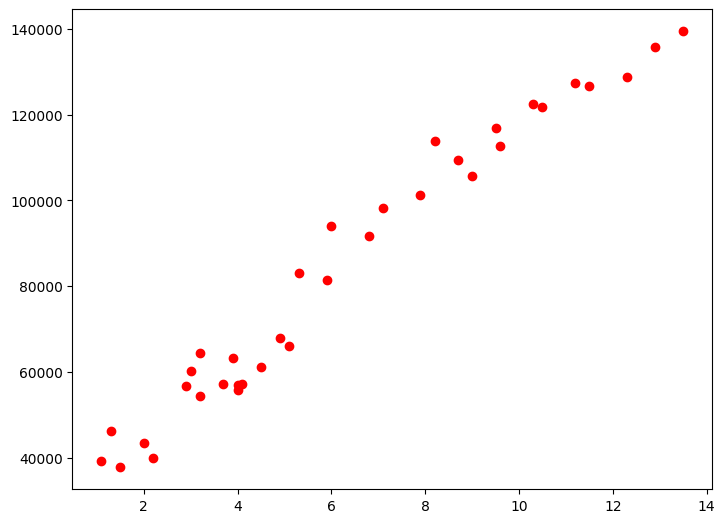

In [8]:
# Plotting the data
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(x, y, color='r')

In [9]:
# Splitting the datset into 80% training data and 20% testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Linear Regression

In [10]:
regressor = LinearRegression()

# Fitting the Linear Regression model
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred

array([[120057.87672477],
       [ 88127.64484315],
       [ 73456.99776241],
       [118331.91824468],
       [ 97620.41648363],
       [ 71731.03928232],
       [ 63101.24688189]])

In [11]:
y_test

array([[121872],
       [ 91738],
       [ 66029],
       [122391],
       [101302],
       [ 67938],
       [ 63218]])

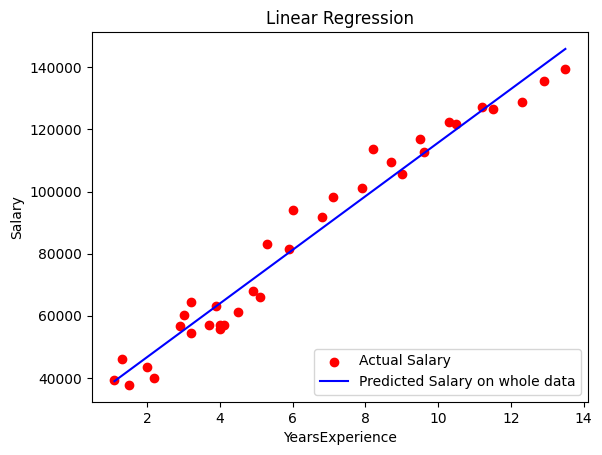

In [12]:
# The plot of prediction on the whole data
plt.scatter(x,y,color='r',label='Actual Salary')
plt.plot(x, regressor.predict(x), color='blue', label='Predicted Salary on whole data')
plt.title('Linear Regression')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend(loc = 'lower right')

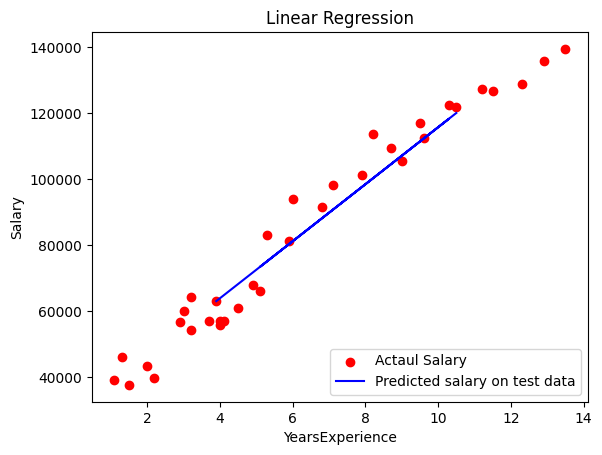

In [13]:
# The plot of the prediction of the test data
plt.scatter(x,y,color='r', label='Actaul Salary')
plt.plot(x_test, y_pred, color='blue', label='Predicted salary on test data')
plt.title('Linear Regression')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend(loc = 'lower right')

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

linear_mae = mean_absolute_error(y_test, y_pred)
linear_mse = mean_squared_error(y_test, y_pred)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, y_pred)

# Polynomial Regression (degree 2)

In [15]:
poly = PolynomialFeatures(degree=2)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.fit_transform(x_test)
x_poly = poly.fit_transform(df)

# Fitting the polynomial model of degree 2
regressor.fit(x_poly_train, y_train)

LinearRegression()

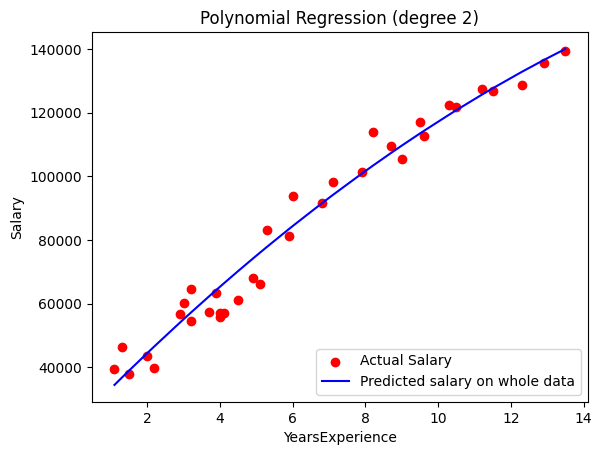

In [16]:
# The plot of prediction on the whole data
plt.scatter(x,y,color='r', label='Actual Salary')
plt.plot(x, regressor.predict(poly.fit_transform(x)), color='blue', label='Predicted salary on whole data')
plt.title('Polynomial Regression (degree 2)')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend(loc = 'lower right')

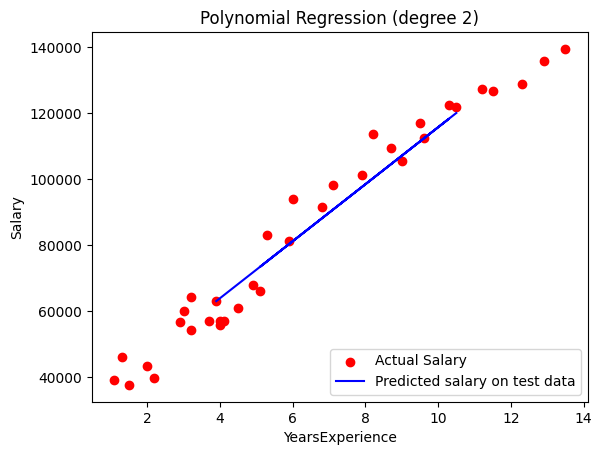

In [17]:
# The plot of the prediction of the test data
plt.scatter(x,y,color='r', label='Actual Salary')
plt.plot(x_test, y_pred, color='blue', label='Predicted salary on test data')
plt.title('Polynomial Regression (degree 2)')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend(loc = 'lower right')

In [18]:
y_pred = regressor.predict(x_poly_test)
y_pred

array([[120768.28626063],
       [ 91478.85578027],
       [ 75975.72281439],
       [119341.07368771],
       [100823.89526211],
       [ 74067.13916629],
       [ 64256.79255069]])

In [19]:
y_test

array([[121872],
       [ 91738],
       [ 66029],
       [122391],
       [101302],
       [ 67938],
       [ 63218]])

In [20]:
poly_mae = mean_absolute_error(y_test, y_pred)
poly_mse = mean_squared_error(y_test, y_pred)
poly_rmse = np.sqrt(poly_mse)
poly_r2 = r2_score(y_test, y_pred)

# Polynomial Regression (degree 3)

In [21]:
poly = PolynomialFeatures(degree=3)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.fit_transform(x_test)
x_poly = poly.fit_transform(df)

regressor.fit(x_poly_train, y_train)

LinearRegression()

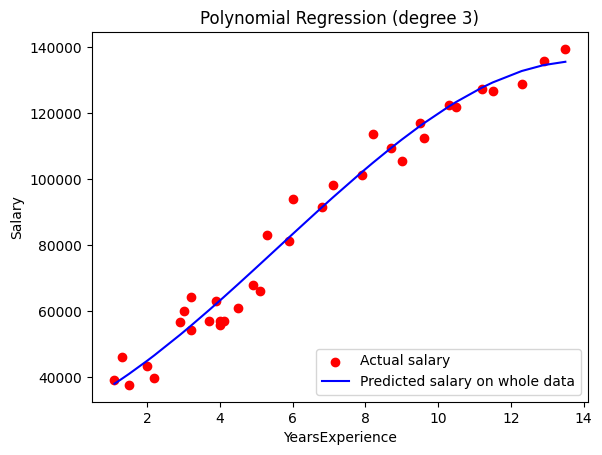

In [22]:
# The plot of prediction on the whole data
plt.scatter(x,y,color='r', label='Actual salary')
plt.plot(x, regressor.predict(poly.fit_transform(x)), color='blue', label='Predicted salary on whole data')
plt.title('Polynomial Regression (degree 3)')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend(loc = 'lower right')

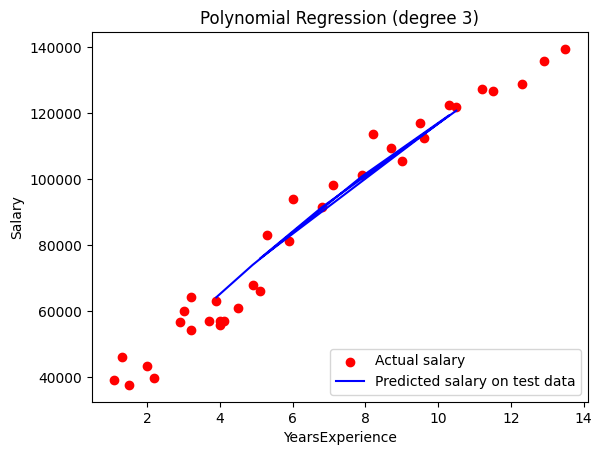

In [23]:
# The plot of the prediction of the test data
plt.scatter(x,y,color='r', label='Actual salary')
plt.plot(x_test, y_pred, color='blue', label='Predicted salary on test data')
plt.title('Polynomial Regression (degree 3)')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend(loc = 'lower right')

In [24]:
y_pred = regressor.predict(x_poly_test)
y_pred

array([[123426.94482914],
       [ 91460.45075608],
       [ 74265.75346509],
       [122068.77728923],
       [102137.99500107],
       [ 72243.44266122],
       [ 62304.47402738]])

In [25]:
y_test

array([[121872],
       [ 91738],
       [ 66029],
       [122391],
       [101302],
       [ 67938],
       [ 63218]])

In [26]:
poly3_mae = mean_absolute_error(y_test, y_pred)
poly3_mse = mean_squared_error(y_test, y_pred)
poly3_rmse = np.sqrt(poly3_mse)
poly3_r2 = r2_score(y_test, y_pred)

# Polynomial Regression (degree 4)

In [27]:
poly = PolynomialFeatures(degree=4)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.fit_transform(x_test)
x_poly = poly.fit_transform(df)

regressor.fit(x_poly_train, y_train)

LinearRegression()

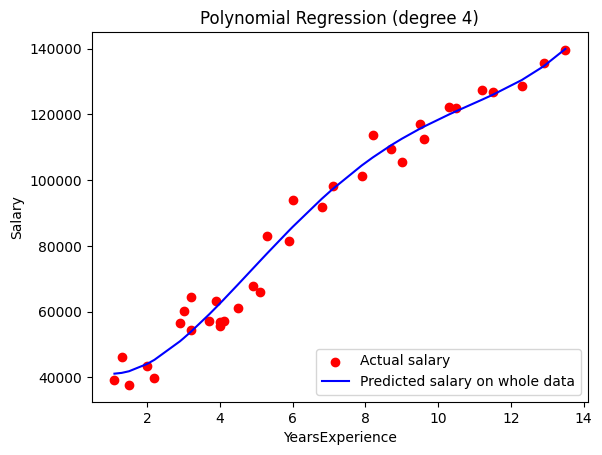

In [28]:
# The plot of prediction on the whole data
plt.scatter(x,y,color='r', label='Actual salary')
plt.plot(x, regressor.predict(poly.fit_transform(x)), color='blue', label='Predicted salary on whole data')
plt.title('Polynomial Regression (degree 4)')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend(loc = 'lower right')

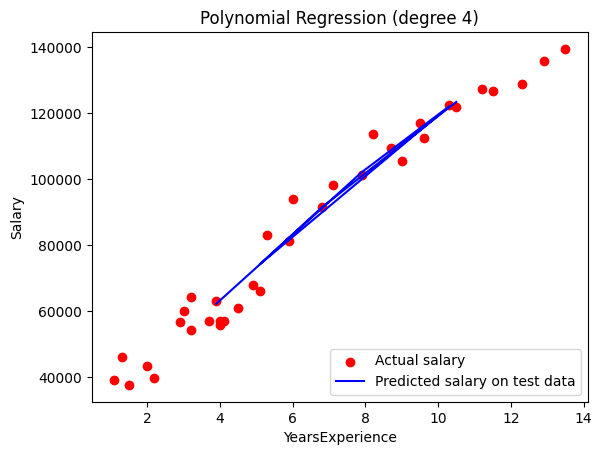

In [29]:
# The plot of the prediction of the test data
plt.scatter(x,y,color='r', label='Actual salary')
plt.plot(x_test, y_pred, color='blue', label='Predicted salary on test data')
plt.title('Polynomial Regression (degree 4)')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend(loc = 'lower right')

In [30]:
y_pred = regressor.predict(x_poly_test)
y_pred

array([[120997.43963364],
       [ 94326.18079744],
       [ 75400.13337121],
       [119991.62524398],
       [104477.32883418],
       [ 73036.29940194],
       [ 61373.75789469]])

In [31]:
y_test

array([[121872],
       [ 91738],
       [ 66029],
       [122391],
       [101302],
       [ 67938],
       [ 63218]])

In [32]:
poly4_mae = mean_absolute_error(y_test, y_pred)
poly4_mse = mean_squared_error(y_test, y_pred)
poly4_rmse = np.sqrt(poly4_mse)
poly4_r2 = r2_score(y_test, y_pred)

## Comparing the above regression models using some metrics to decide which model performs the best

In [33]:
print("Linear Regression Metrics:")
print(f"MAE: {linear_mae:.2f}")
print(f"MSE: {linear_mse:.2f}")
print(f"RMSE: {linear_rmse:.2f}")
print(f"R-squared: {linear_r2:.2f}")

print("\nPolynomial Regression Metrics (Degree 2):")
print(f"MAE: {poly_mae:.2f}")
print(f"MSE: {poly_mse:.2f}")
print(f"RMSE: {poly_rmse:.2f}")
print(f"R-squared: {poly_r2:.2f}")

print("\nPolynomial Regression Metrics (Degree 3):")
print(f"MAE: {poly3_mae:.2f}")
print(f"MSE: {poly3_mse:.2f}")
print(f"RMSE: {poly3_rmse:.2f}")
print(f"R-squared: {poly3_r2:.2f}")

print("\nPolynomial Regression Metrics (Degree 4):")
print(f"MAE: {poly4_mae:.2f}")
print(f"MSE: {poly4_mse:.2f}")
print(f"RMSE: {poly4_rmse:.2f}")
print(f"R-squared: {poly4_r2:.2f}")

Linear Regression Metrics:
MAE: 3500.42
MSE: 16561691.22
RMSE: 4069.61
R-squared: 0.97

Polynomial Regression Metrics (Degree 2):
MAE: 3143.65
MSE: 21199815.15
RMSE: 4604.33
R-squared: 0.96

Polynomial Regression Metrics (Degree 3):
MAE: 2349.49
MSE: 12930439.43
RMSE: 3595.89
R-squared: 0.98

Polynomial Regression Metrics (Degree 4):
MAE: 3621.59
MSE: 20073610.64
RMSE: 4480.36
R-squared: 0.96


For the above dataset, the Polynomial Regression model with degree 3 works the best.

We can see from the plotted graph of predicted values (y_pred) against the actual values (y_test) that the points allign the best in this case. 

Also after using the metrics, we can conclude that Polynomial Regression of degree 3 is best suited model for the above dataset as it has low MAE, MSE, RMSE and high r2 score among other models.